# Method (2)

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# Load the pickle file
* All the dataset have done with data cleaning
* Check the dataset type and its information

In [20]:
train_df = pd.read_pickle("train_with_emotion.pkl")
test_df = pd.read_pickle("test_with_emotion.pkl")

In [21]:
train_df.head()

,tweet_id,text,emotion
0,0x29e452,Huge Respect🖒 talking about losing his dad to...,joy
1,0x2b3819,Yoooo we hit all our monthly goals with the ne...,joy
2,0x2a2acc,_BCH Well done team 🌟 <LH> of every one of ...,trust
3,0x2a8830,Come join on PUBG while he strives for chicke...,joy
4,0x20b21d,Blessings!My strength little. My bones brittl...,anticipation


In [22]:
test_df.head()

,tweet_id,text
0,0x28cc61,I've seen two separate colours of the elegant...
1,0x2db41f,No serious self respecting individual believ...
2,0x2466f6,"Looking for a new car, and it says 1 lady owne..."
3,0x23f9e9,“only the brave” just out and fountain park h...
4,0x1fb4e1,Felt like total dog 💩 going into open gym and ...


In [23]:
# Seperate the training set to training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(train_df, test_size = 0.2, random_state = 1, shuffle = True)

In [24]:
# save to pickle file
import pickle
X_train.to_pickle("1207_bert_X_train.pkl") 
X_test.to_pickle("1207_bert_X_test.pkl")

In [25]:
bert_X_train_df = pd.read_pickle("1207_bert_X_train.pkl")
bert_X_test_df = pd.read_pickle("1207_bert_X_test.pkl")

In [26]:
bert_X_train_df.keys()

Index(['tweet_id', 'text', 'emotion'], dtype='object')

In [27]:
bert_X_train_df.text.tolist()

['FailureFriday ....Now , Back to Russia! ImpeachTrump tiredofwinning  <LH> HealthCareForAll',
 '  <LH> Holidays',
 'Tonight  <LH>  8pm-12MidNite  Victory <LH> Chapel',
 'Sitting on a plane reflecting on the many leaders who help me laugh, learn, and grow. <LH>   .',
 ' Only sikhs have conquered Afghanistan. Many superpowers have lost the wars in there. <LH> history of Sikhs',
 ' was <LH> yesterday with  he wasn’t smiling or laughing as usual and he was talking very slowly',
 ' Greetings! <LH> for Safety.Pray for Recovery.Pray for Restoration. <LH> Harvey2017',
 'Wish you all a very <LH> Navratri ☺️🙏',
 'How am I supposed to believe 4 AA’s don’t put Roman away but 1 spear puts Cena away??? WWENoMercy <LH>',
 'I Amplify & Multiply The Righteous Voice; OR Pull down, Silence, Shut <LH> the Poisonous Voice & Kill it.',
 'Straight up this crown and 🛀 has me feeling me so perfect. <LH>',
 ' I dont get it? Is this supposed to be a supportive statement? <LH>',
 ' Doing what we love, loving wha

In [28]:
bert_X_train_df.emotion

754714         sadness
105795             joy
33277     anticipation
723943           trust
139949           trust
              ...     
836489             joy
491263             joy
470924             joy
491755        surprise
128037             joy
Name: emotion, Length: 1164450, dtype: object

In [29]:
X_train = np.array(bert_X_train_df.text)
y_train = np.array(bert_X_train_df.emotion)

X_test = np.array(bert_X_test_df.text)
y_test = np.array(bert_X_test_df.emotion)

In [30]:
len(X_train), len(X_test)

(1164450, 291113)

In [31]:
X_train

array(['FailureFriday ....Now , Back to Russia! ImpeachTrump tiredofwinning  <LH> HealthCareForAll',
       '  <LH> Holidays',
       'Tonight  <LH>  8pm-12MidNite  Victory <LH> Chapel', ...,
       'Treating mom with front row seats to the  season opener this Sunday 🤘🤘✊🏼 thankyougod <LH>',
       '  Great Job <LH>',
       '  Has one of the best "What the Hell?" looks ever!!! <LH> FostersProm'],
      dtype=object)

In [32]:
train_df['emotion'].value_counts()

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64

In [33]:
train_df['emotion'].value_counts(normalize = True)

joy             0.354514
anticipation    0.171023
trust           0.141167
sadness         0.132895
disgust         0.095565
fear            0.043969
surprise        0.033478
anger           0.027389
Name: emotion, dtype: float64

<AxesSubplot:>

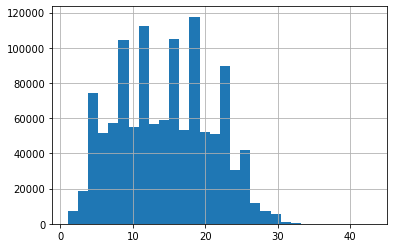

In [34]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in bert_X_train_df.text]

pd.Series(seq_len).hist(bins = 30)

In [35]:
# Take the average of length and let the tensorflow do the padding
max_seq_len = 15

# Model Implementation and its settings
ktrain
* The more details of ktrain is here : https://github.com/amaiya/ktrain
* Brief introduction : ktrain is a Python library that makes deep learning and AI more accessible and easier to apply.
* Call the pretrained model
* Feature engineering(Bert tokenizer)

In [ ]:
#!pip install ktrain

In [36]:
import ktrain
from ktrain import text

In [37]:
class_n = ['anger', 'anticipation', 'disgust', 'fear', 'sadness', 'surprise', 'trust','joy']

In [38]:
#Select the pre-trained model
#More information : https://huggingface.co/transformers/pretrained_models.html
#https://towardsdatascience.com/ktrain-a-lightweight-wrapper-for-keras-to-help-train-neural-networks-82851ba889c
Model_name = 'distilbert-base-uncased'

In [39]:
trans = text.Transformer(Model_name = 'distilbert-base-uncased', maxlen=15, class_names=class_n)

In [40]:
train_data = trans.preprocess_train(X_train, y_train)
test_data = trans.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 14
	95percentile : 25
	99percentile : 28


C:\ProgramData\Anaconda3\envs\DM\lib\site-packages\ktrain\utils.py:589: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 14
	95percentile : 25
	99percentile : 28


In [41]:
# Call the pretrained model in ktrain
model = trans.get_classifier()

The batch_size here I can only set 50 or 100 due to the limitation of my GPU

If it is larger than 100, the system will give me error message

The Attention takes time to train, each epoch needs around thirty minutes to train and validate

In [42]:
learner = ktrain.get_learner(model, train_data = train_data, val_data = test_data, batch_size = 50)
#learner.lr_find(show_plot = True, max_epochs = 100)

Due to the time limitation, I set the number of epochs 10

It should be larger if I want better accuracy

In [43]:
learner.fit_onecycle(1e-4, 5)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/5
23289/23289 [==============================] - 2271s 98ms/step - loss: 1.3248 - accuracy: 0.5188 - val_loss: 1.2523 - val_accuracy: 0.5454
Epoch 2/5
23289/23289 [==============================] - 2294s 99ms/step - loss: 1.2217 - accuracy: 0.5575 - val_loss: 1.2513 - val_accuracy: 0.5452
Epoch 3/5
23289/23289 [==============================] - 2246s 96ms/step - loss: 1.1859 - accuracy: 0.5716 - val_loss: 1.2371 - val_accuracy: 0.5510
Epoch 4/5
23289/23289 [==============================] - 2242s 96ms/step - loss: 1.0756 - accuracy: 0.6128 - val_loss: 1.2486 - val_accuracy: 0.5584
Epoch 5/5
23289/23289 [==============================] - 2244s 96ms/step - loss: 0.8689 - accuracy: 0.6879 - val_loss: 1.3352 - val_accuracy: 0.5543


In [44]:
learner.validate()

              precision    recall  f1-score   support

           0       0.41      0.25      0.31      8048
           1       0.62      0.60      0.61     49631
           2       0.41      0.39      0.40     27840
           3       0.59      0.46      0.52     12863
           4       0.61      0.73      0.67    103243
           5       0.45      0.49      0.47     38640
           6       0.45      0.23      0.30      9892
           7       0.52      0.39      0.45     40956

    accuracy                           0.55    291113
   macro avg       0.51      0.44      0.47    291113
weighted avg       0.55      0.55      0.55    291113



array([[ 2028,   464,  1376,   169,  1684,  1954,    83,   290],
       [  251, 29551,  1594,   678, 11388,  2889,   303,  2977],
       [  749,  1384, 10764,   524,  5496,  7343,   496,  1084],
       [  146,  1041,   854,  5966,  2694,  1438,   179,   545],
       [  573,  7949,  3481,  1316, 75795,  5748,   759,  7622],
       [  906,  2142,  5666,   731,  8134, 19053,   590,  1418],
       [  125,   704,  1229,   282,  2848,  1933,  2254,   517],
       [  174,  4263,  1448,   492, 15973,  2348,   314, 15944]],
      dtype=int64)

In [45]:
# See the validation F1-score
learner.validate(class_names=class_n)

              precision    recall  f1-score   support

       anger       0.41      0.25      0.31      8048
anticipation       0.62      0.60      0.61     49631
     disgust       0.41      0.39      0.40     27840
        fear       0.59      0.46      0.52     12863
     sadness       0.61      0.73      0.67    103243
    surprise       0.45      0.49      0.47     38640
       trust       0.45      0.23      0.30      9892
         joy       0.52      0.39      0.45     40956

    accuracy                           0.55    291113
   macro avg       0.51      0.44      0.47    291113
weighted avg       0.55      0.55      0.55    291113



array([[ 2028,   464,  1376,   169,  1684,  1954,    83,   290],
       [  251, 29551,  1594,   678, 11388,  2889,   303,  2977],
       [  749,  1384, 10764,   524,  5496,  7343,   496,  1084],
       [  146,  1041,   854,  5966,  2694,  1438,   179,   545],
       [  573,  7949,  3481,  1316, 75795,  5748,   759,  7622],
       [  906,  2142,  5666,   731,  8134, 19053,   590,  1418],
       [  125,   704,  1229,   282,  2848,  1933,  2254,   517],
       [  174,  4263,  1448,   492, 15973,  2348,   314, 15944]],
      dtype=int64)

# Predict the testing set 

In [46]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [47]:
#pred_result = predictor.predict(test_df.text)
pred_result = predictor.predict(test_df.text.tolist())

In [48]:
pred_result[:5]

['joy', 'sadness', 'sadness', 'sadness', 'disgust']

In [ ]:
from pandas import DataFrame
sub = pred_result
sub_bert_df = DataFrame(sub,columns=['emotion'])
sub_bert_df.to_csv('ktrain_bert.csv')

# Save the model
contain three file in the folder
* config.json
* model.h5
* model.preproc

In [ ]:
predictor.save('bert_epoch')

# Other Implementation of Bert
* Find some source codes from github, but have not utilize yet to see the result

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [ ]:
#impport bert
bert = AutoModel.from_pretrained('')

In [ ]:
import numpy as np
import pandas as pd
import torch
import transformers as ppb # pytorch transformers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
#Convert Integer Sequences to Tensors
import keras
from sklearn.preprocessing import LabelEncoder
train_label = bert_X_train_df.emotion
test_label = bert_X_test_df.emotion

label_encoder = LabelEncoder()
label_encoder.fit(train_label)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)


train_label = label_encode(label_encoder, train_label)
test_label = label_encode(label_encoder, test_label)
true_label =
train_label[0:8]

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 15000

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# tokenize and encode sequences in the training set
tokens_train = tokenizer.batch_encode_plus(
    bert_X_train_df.text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    bert_X_test_df.text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_df.text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

In [ ]:
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_label.tolist())

# for validation set
val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(test_label.tolist())

# for test set
#test_seq = torch.tensor(tokens_test['input_ids'])
#test_mask = torch.tensor(tokens_test['attention_mask'])
#test_y = torch.tensor(test_df.tweet_id.tolist())

In [ ]:
# freeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

In [ ]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')

## Want BERT instead of distilBERT? Uncomment the following line:
#model_class, tokenizer_class, pretrained_weights = (ppb.BertModel, ppb.BertTokenizer, 'bert-base-uncased')

# Load pretrained model/tokenizer
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

In [ ]:
tokenized = bert_X_train_df['text'].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [ ]:
input_ids = torch.tensor(np.array(padded))

with torch.no_grad():
    last_hidden_states = model(input_ids)

In [ ]:
#Slice the output for the first position for all the sequences, take all hidden unit outputs
features = last_hidden_states[0][:,0,:].numpy()

In [ ]:
labels = bert_X_train_df['emotion']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels)

In [ ]:
lr_clf = LogisticRegression()
lr_clf.fit(train_features, train_labels)

In [ ]:
lr_clf.score(test_features, test_labels)